# Actividad 2: Reconocimiento de imagenes más complejas utilizando redes neuronales convolucionales.

En esta actividad se llevará el reconocimiento de imagenes al siguiente nivel, reconociendo imágenes reales de Gatos y Perros para clasificar una imagen entrante como una u otra. En particular, algunos dataset como el reconocimiento de la escritura a mano agilizará el proceso al hacer que todas las imágenes tengan el mismo tamaño y forma, y todas fueran monocromo. Las imágenes del mundo real no son así... tienen diferentes formas, proporciones de aspecto, etc., ¡y normalmente son en color!

Así que, como parte de la tarea necesaria para el proceso de los datos... no es menos importante redimensionarlos para que tengan una forma uniforme.

Para completar esta actividad, se deben realizar los siguientes pasos:

1. Explorar los datos de ejemplo de gatos y perros
2. Preprocesar los datos
3. Construir y entrenar una red neuronal para reconocer la diferencia entre los dos
4. Evaluar la precisión del entrenamiento y la validación


# 1. Exploración de los datos

Comenzar descargando los datos de ejemplo, un .zip de 2.000 fotos JPG de gatos y perros, y extrayéndolo localmente en /tmp.

In [2]:
import urllib.request
url = ' https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
filename = '/tmp/cats_and_dogs_filtered.zip'
urllib.request.urlretrieve(url, filename)

('/tmp/cats_and_dogs_filtered.zip',
 <http.client.HTTPMessage at 0x7f686ae94290>)

El siguiente código en Python utiliza la biblioteca del OS para usar las bibliotecas del sistema operativo, proporcionando acceso al sistema de archivos, y la biblioteca de archivos zip, que permite descomprimir los datos.

In [3]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

A continuación se definen los directorios a utilizar para entrenar esta red neuronal

In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directorio para la entrenamiento de las imagenes de gatos
train_cats_dir = os.path.join(train_dir, 'cats')

# Directorio para la validación de las imagenes de perros
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio para la validación de las imagenes de perros y gatos
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Se observan los nombres de los archivos en los directorios de los entrenamientos de perros y gatos (las convenciones de nombres de archivos son las mismas en el directorio de validación):

In [5]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.900.jpg', 'cat.596.jpg', 'cat.977.jpg', 'cat.360.jpg', 'cat.403.jpg', 'cat.146.jpg', 'cat.988.jpg', 'cat.210.jpg', 'cat.953.jpg', 'cat.780.jpg']
['dog.963.jpg', 'dog.533.jpg', 'dog.907.jpg', 'dog.722.jpg', 'dog.438.jpg', 'dog.251.jpg', 'dog.982.jpg', 'dog.40.jpg', 'dog.858.jpg', 'dog.774.jpg']


Se descubre el número total de imágenes de gatos y perros en los directorios de entrenamiento y validación:

In [6]:
print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_dogs_dir) ))

print('total validation cat images :', len(os.listdir(validation_cats_dir)))
print('total validation dog images :', len(os.listdir( validation_dogs_dir)))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


Se diseñará ahora una CNN para la clasificación de un problema binario (perros y gatos):

**Ejercicio 1 ( 5 puntos)**: Diseñar una red neuroanl convolucional para clasificar las imagenes de perros y gatos. Evaluar los requisitos de la red neuronal que se pide y construirla completando los parametros necesarios para que las capas de la red neuronal sean optimas para la tarea de clasificar los perros y gatos.


In [7]:
import tensorflow as tf
from keras.layers import Flatten, Add, Dense, Activation, MaxPooling2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from keras.models import Sequential, Model, load_model  
# tu código para la red neuronal del ejercicio 1 aquí

"""
Función que crea una red neuronal convolucional (CNN) específica (parámetros fijos)
"""
def create_cnn():
  # Definimos un modelo secuencial en el que vamos construyendo las distintas capas
  model = Sequential([
    # La primera capa convolucional (Conv2D) utilizará 16 filtros, un kernel de 3x3 y una función relu 
    # para conseguir el primer mapa de características.
    # Además se realiza un redimensionado de las imágenes de entrada, todas en color y con dimensiones diferentes
    # Se elige una dimensión de 150 x 150 píxeles y 3 capas de color.
    Conv2D(16, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu'),
    # A la convolución le sigue la capa de agrupación máxima con una ventana de 2x2 que reduce la dimensión de las
    # características obtenidas tras la primera convolución.
    MaxPooling2D(pool_size=(2, 2)),

    # La segunda capa de convolución extrae 32 filtros, kernel 3x3 y función relu.
    # A la convolución le sigue la capa de agrupación máxima con una ventana de 2x2
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # La tercera capa de convolución extrae 64 filtros, kernel 3x3 y función relu.
    # A la convolución le sigue la capa de agrupación máxima con una ventana de 2x2
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Después de las 3 capas convolucionales pasamos a la red neuronal tradicional, para lo que 
    # aplicamos la función Flatten para aplanar el mapa de características a un tensor de 1 atenuación
    # para que podamos agregar capas completamente conectadas
    Flatten(),

    # Crea una capa completamente conectada con activación ReLU y 512 neuronas en la capa oculta
    Dense(512, activation='relu'),

    # Cree una capa de salida con un solo nodo y activación sigmoidea
    # No necesitamos más que una neurona de salida porque tenemos clasificación binaria (2 clases),
    # por lo que podemos obtener los resultados usando sólo 1 salida
    Dense(1, activation='sigmoid')
  ])
  return model

model = create_cnn()



Se comprueba el modelo:

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

**Ejercicio 2 (1 punto)**: A continuación habrá que compilar el modelo, para ello usar el optimizador RMSprop, para el loss. Se debe tener en cuenta los elementos a  clasificar, en este caso perros y gatos (un clasificador binario). Como métrica mostrar la precisión.

In [9]:
# tu código para la compilación del ejercicio 2 aquí

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=["accuracy"])

# 2. Preprocesamiento de los datos

Una buena practica cuando se trate de clasificar imagenes, es pretratar los datos (imagenes) para mejorar la precisión de la CNN

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Todas las imagenes tienen que ser reescaldas a 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "train_datagen generator"
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "test_datagen generator"
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 3. Construcción del modelo, entreno y validación.

**Ejercicio 3 (1 puntos)**: Para concluir la creación de la CNN para la clasificación de perros y gatos, falta entrenar la red neuronal. Para ello escribir, crear la variable "history" y guardar en esa variable el modelo entrenado de la CNN. Para el entrenamiento, se deberán definir los "step_per_epoch", el número de "epochs", el número de "validation_steps" y usar "verbose=2".

In [ ]:
# tu código para la variable history que guarda el entrenamiento de la CNN del ejercicio 3 aquí

history = model.fit(
    train_generator, 
    epochs=15, 
    steps_per_epoch=100, 
    validation_data=validation_generator, 
    verbose = 2, 
    validation_steps=50)


Epoch 1/15
100/100 - 65s - loss: 0.7667 - accuracy: 0.5450 - val_loss: 0.6888 - val_accuracy: 0.5440
Epoch 2/15
100/100 - 63s - loss: 0.6767 - accuracy: 0.6065 - val_loss: 0.6356 - val_accuracy: 0.6610
Epoch 3/15
100/100 - 62s - loss: 0.5965 - accuracy: 0.6855 - val_loss: 0.5926 - val_accuracy: 0.6970
Epoch 4/15
100/100 - 62s - loss: 0.5293 - accuracy: 0.7365 - val_loss: 0.6520 - val_accuracy: 0.6650
Epoch 5/15
100/100 - 62s - loss: 0.4481 - accuracy: 0.7870 - val_loss: 0.6410 - val_accuracy: 0.6890
Epoch 6/15
100/100 - 62s - loss: 0.3495 - accuracy: 0.8465 - val_loss: 0.8149 - val_accuracy: 0.6600
Epoch 7/15
100/100 - 62s - loss: 0.2628 - accuracy: 0.8795 - val_loss: 0.7332 - val_accuracy: 0.6970
Epoch 8/15
100/100 - 62s - loss: 0.1865 - accuracy: 0.9345 - val_loss: 1.0513 - val_accuracy: 0.6790
Epoch 9/15
100/100 - 62s - loss: 0.1419 - accuracy: 0.9525 - val_loss: 1.1712 - val_accuracy: 0.6910
Epoch 10/15
100/100 - 62s - loss: 0.0888 - accuracy: 0.9660 - val_loss: 1.6201 - val_accura

# 4. Evaluando la precisión y la perdida del modelo


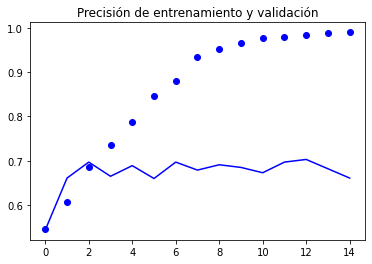

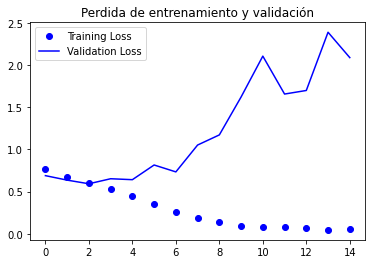

In [ ]:
#-----------------------------------------------------------
# Recuperar una lista de resultados de la lista de datos de los conjuntos de entrenamiento y pruebas para cada epoch de entrenamiento
#-----------------------------------------------------------
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
# Imprimir la precisión del entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Precisión de entrenamiento y validación')

plt.figure()

#------------------------------------------------
# Imprimir la perdida de entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Perdida de entrenamiento y validación')
plt.legend()

plt.show()

Como se puede observar, este es un claro ejemplo de overfitting, algo que naturalmente se quiere evitar para que las redes neuronales sean lo más precisas posibles.

**Ejercicio 4 (3 puntos)**: Para soluciónar este problema, se debe rehacer algunas partes del código anterior utilizando las técnicas de regularización aprendidas en clase, como el data augmentation.

*Consejo*: Volver a escribir otra vez todas las secciones y cambiar el código necesario aplicando las técnicas de regularización elegidas. Se debe recordar que este tipo de técnicas se suele usar en el preprocesamiento de los datos.

*Aclaración*: Se espera que al menos se use una de las técnicas de regularización aprendidas en clase. Se valorará positivamente razonar el motivo del uso de la técnica escogida (o escogidas en el caso de ser varias) y no las otras.

A modo orientativo, se espera obtener un resultado gráfico similar a este:

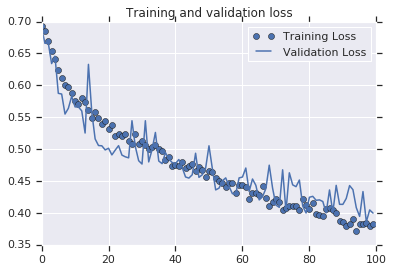
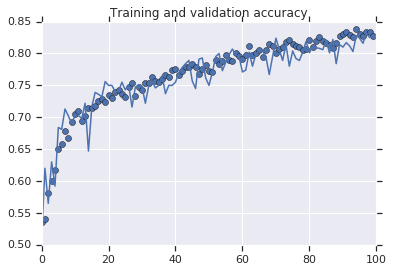

In [ ]:
### Tu código aquí para la reducción del overfitting del ejercicio 4 aquí ###

## Exploración Data Augmentation y Dropout

Existen varias técnicas para mejorar el entrenamiento reduciendo el sobre ajuste de los datos. Como tenemos un conjunto de entrenamiento muy pequeño, en primer lugar optamos por aumentar la muestra de imágenes para entrenar usando la técnica de data augmentation.

Configuraremos una serie de transformaciones aleatorias que se realizarán en las imágenes leídas por nuestra instancia ImageDataGenerator:



*   Rotación de 40º --> rotation_range
*   Movimiento aleatorio en la dirección horizontal y vertical --> width/height_shift_range
*   Grado de transformación de cortante --> shear_range
*   Zoom aleatorio --> zoom_range
*   Volteo horizontal del la imagen --> horizontal_flip
*   En los casos en que necesitamos rellenar píxeles (rotación o desplazamientos horizontal y vertical) se hace utilizando los píxeles vecinos --> fill_mode








In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

Descargamos y extraemos las imágenes

In [ ]:
url = ' https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
filename = '/tmp/cats_and_dogs_filtered.zip'
urllib.request.urlretrieve(url, filename)

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directorio para la entrenamiento de las imagenes de gatos
train_cats_dir = os.path.join(train_dir, 'cats')

# Directorio para la validación de las imagenes de perros
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio para la validación de las imagenes de perros y gatos
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

A continuación, aplicamos las transformaciones de datagen a una imagen de gato del conjunto de entrenamiento para producir cinco variantes aleatorias. Puede volver a ejecutar la celda varias veces para ver nuevos lotes de variantes aleatorias.

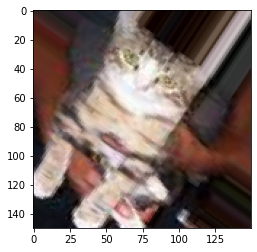

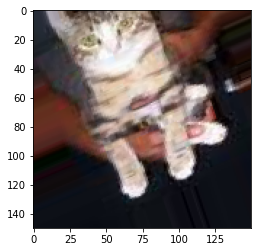

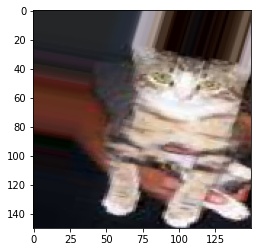

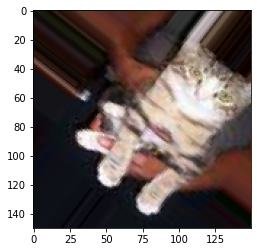

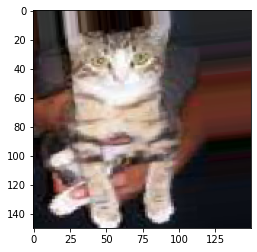

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path = os.path.join(train_cats_dir, train_cat_fnames[5])
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

## El comando .flow () a continuación genera lotes de imágenes transformadas aleatoriamente
## Se repetirá indefinidamente, ¡así que necesitamos "romper" el ciclo en algún momento!
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

### Agregar Data Argumentation al preprocesamiento

Ahora agregamos nuestras transformaciones de aumento de datos de Exploring Data Augmentation a nuestra configuración de preprocesamiento de datos:

In [ ]:
# Añadiendo cambio de escala, rango de rotación, rango de cambio de ancho, rango de cambio de altura,
# shear_range, zoom_range y volteo horizontal a nuestro ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Los valores de validación no son aumentados.
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Si entrenamos una nueva red usando esta configuración de aumento de datos, nuestra red nunca verá la misma entrada dos veces. Sin embargo, las entradas que ve todavía están muy intercorrelacionadas, por lo que es posible que esto no sea suficiente para eliminar por completo el sobreajuste.

### Añadiendo Dropout

Aplicaremos también Dropout para evitar el overfitting en la parte de la red neuronal clásica.

Dropout es un metodo que desactiva un numero de neuronas de una red neuronal de forma aleatoria. En cada iteración de la red neuronal dropout desactivara diferentes neuronas, las neuronas desactivadas no se toman en cuenta para el forwardpropagation ni para el backwardpropagation lo que obliga a las neuronas cercanas a no depender tanto de las neuronas desactivadas. Este metodo ayuda a reducir el overfitting ya que las neuronas cercanas suelen aprender patrones que se relacionan y estas relaciones pueden llegar a formar un patron muy especifico con los datos de entrenamiento, con dropout esta dependencia entre neuronas es menor en toda la red neuronal, de esta manera la neuronas necesitan trabajar mejor de forma solitaria y no depender tanto de las relaciones con las neuronas vecinas.

In [ ]:
def create_cnn_2():
  # Nuestro mapa de características de entrada es 150x150x3: 150x150 para los píxeles 
  # de la imagen y 3 para los tres canales de color: R, G y B
  model = Sequential([

    # La primera convolución extrae 16 filtros que son 3x3
    # A la convolución le sigue la capa de agrupación máxima con una ventana de 2x2
    Conv2D(16, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # La segunda convolución extrae 32 filtros que son 3x3
    # A la convolución le sigue la capa de agrupación máxima con una ventana de 2x2
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # La tercera convolución extrae 64 filtros que son 3x3
    # A la convolución le sigue la capa de agrupación máxima con una ventana de 2x2
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Aplanar el mapa de características a un tensor de 1 atenuación para que podamos
    # agregar capas completamente conectadas
    Flatten(),

    # Crea una capa completamente conectada con activación ReLU y 512 unidades ocultas
    Dense(512, activation='relu'),

    # Agrega una tasa de Dropout de 0.5
    Dropout(0.5),

    # Cree una capa de salida con un solo nodo y activación sigmoidea
    Dense(1, activation='sigmoid')
  ])
  return model

model = create_cnn_2()

# Compilar modelo
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=["accuracy"])

### Entrenar el modelo

Con Data augmentation y dropout, reentrenamos nuestro modelo. Esta vez, entrenamos en las 2000 imágenes disponibles, más las generadas artificialmente, ponemos 100 epochs pero entrenamos usando callbacks para parar el entrenamiento cuando se alcance el 95% de accuracy y así reduciendo también el overfiting.

Definimos un callback si el accuracy supera el 95%

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
callbacks = myCallback()
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 100,
            validation_steps = 50,
            verbose = 2,
            callbacks=[callbacks])


Epoch 1/100
100/100 - 70s - loss: 0.6901 - accuracy: 0.5785 - val_loss: 0.7567 - val_accuracy: 0.5110
Epoch 2/100
100/100 - 69s - loss: 0.6731 - accuracy: 0.6195 - val_loss: 0.6316 - val_accuracy: 0.6340
Epoch 3/100
100/100 - 69s - loss: 0.6525 - accuracy: 0.6255 - val_loss: 0.5975 - val_accuracy: 0.6740
Epoch 4/100
100/100 - 69s - loss: 0.6414 - accuracy: 0.6455 - val_loss: 0.5979 - val_accuracy: 0.6840
Epoch 5/100
100/100 - 69s - loss: 0.6417 - accuracy: 0.6465 - val_loss: 0.5916 - val_accuracy: 0.6870
Epoch 6/100
100/100 - 69s - loss: 0.6219 - accuracy: 0.6570 - val_loss: 0.5659 - val_accuracy: 0.7060
Epoch 7/100
100/100 - 69s - loss: 0.6195 - accuracy: 0.6630 - val_loss: 0.5670 - val_accuracy: 0.7100
Epoch 8/100
100/100 - 70s - loss: 0.6003 - accuracy: 0.6875 - val_loss: 0.5495 - val_accuracy: 0.7060
Epoch 9/100
100/100 - 70s - loss: 0.5910 - accuracy: 0.6910 - val_loss: 0.5604 - val_accuracy: 0.7250
Epoch 10/100
100/100 - 69s - loss: 0.5976 - accuracy: 0.6735 - val_loss: 0.5655 - 

Con el aumento de datos implementado y el dropout hemos conseguido mejorar resultados evitando overfiting: en el primer modelo con 15 epochs teníamos un val_accuracy de 66,10% y ahora en ese mismo punto la val_accuracy es de 75,60%. 

Sin embargo, después de 100 epoch hemos alcanzado sólo un 73,90% de accuracy en validación lo que nos hace pensar que, a pesar del data augmentation y el dropout nuestra muestra de entrenamiento no es lo suficientemente grande.

### Evalua resultados


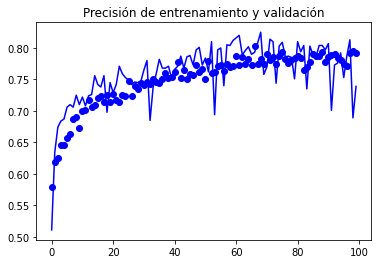

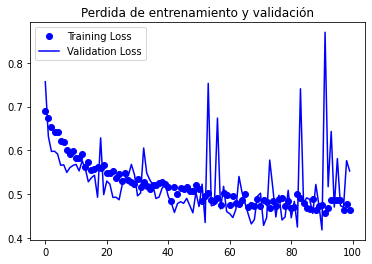

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
# Imprimir la precisión del entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Precisión de entrenamiento y validación')

plt.figure()

#------------------------------------------------
# Imprimir la perdida de entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Perdida de entrenamiento y validación')
plt.legend()

plt.show()


Ya no estamos sobreajustando y hemos ganado más de 10 puntos porcentuales de accuracy de validación. 
Sin embargo a requerido muchas epochs y además los datos de accuracy y loss se modificaban de forma muy lenta y con muchas fluctuaciones. Creemos que con otro tipo de técnica, como es Transfer Learning conseguiríamos resultados mucho mejores si encontramos una red ya diseñada y entrenada con características similares a la que estamos queriendo entrenar.

# Combinamos Transfer learning y Data augmentation



Vamos a realizar además del data augmentation y dropout transfer learning. 

In [8]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

### Importamos el modelo InceptionV3

El modelo Inception-V3 es un modelo de clasificación de imágenes entrenado por Google en la gran base de datos de imágenes ImageNet. Este modelo puede clasificar imágenes en 1000 categorías. 

Nosotros sólo queremos clasificar perros y gatos, así que tendremos que cambiar la parte final del modelo. Pero como la tarea es similar suponemos que el modelado y entrenamiento de la parte de CNN sería válido también para nuestra tarea.

In [9]:
from tensorflow.keras.applications.inception_v3 import InceptionV3


Hacemos uso de todas las capas del modelo excepto la última capa densa (totalmente conectada)

In [10]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

87924736/87910968 [==============================] - 1s 0us/step


Hacemos que las capas no sean entrenables.



In [11]:
for layer in pre_trained_model.layers:
  layer.trainable = False

Vemos la red que tenemos

In [12]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

### Entrenamos el modelo

Definimos la red fully conected: flatten, una capa densa de 1024 neuronas y relu como función de activación, una capa de dropout de 0.2 y una última capa de 1 neurona con activación sigmoide

In [16]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(learning_rate=0.0001),  #Usamos RMSprop para el learningrate: tambien podemos usar Adam o Adagrad
              loss = 'binary_crossentropy',  #Usamnos binary_crossentropy porque tenemos 2 clases a predecir (perros y gatos)
              metrics = ['accuracy'])

Hacemos data augmentation como hicimos antes.

In [17]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Entrenamos la red

In [18]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

In [19]:

callbacks = myCallback()
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 100,
            validation_steps = 50,
            verbose = 2,
            callbacks=[callbacks])

Epoch 1/100
100/100 - 156s - loss: 1.1711 - accuracy: 0.8430 - val_loss: 0.4020 - val_accuracy: 0.9120
Epoch 2/100
100/100 - 152s - loss: 0.4161 - accuracy: 0.8945 - val_loss: 0.1979 - val_accuracy: 0.9540
Epoch 3/100
100/100 - 149s - loss: 0.4119 - accuracy: 0.9010 - val_loss: 0.2880 - val_accuracy: 0.9260
Epoch 4/100
100/100 - 149s - loss: 0.3225 - accuracy: 0.9035 - val_loss: 0.1297 - val_accuracy: 0.9570
Epoch 5/100
100/100 - 148s - loss: 0.3115 - accuracy: 0.9115 - val_loss: 0.2752 - val_accuracy: 0.9370
Epoch 6/100
100/100 - 149s - loss: 0.3080 - accuracy: 0.9190 - val_loss: 0.1267 - val_accuracy: 0.9640
Epoch 7/100
100/100 - 149s - loss: 0.3671 - accuracy: 0.9155 - val_loss: 0.1922 - val_accuracy: 0.9460
Epoch 8/100
100/100 - 148s - loss: 0.2975 - accuracy: 0.9290 - val_loss: 0.1560 - val_accuracy: 0.9660
Epoch 9/100
100/100 - 148s - loss: 0.2990 - accuracy: 0.9275 - val_loss: 0.1435 - val_accuracy: 0.9620
Epoch 10/100
100/100 - 148s - loss: 0.2393 - accuracy: 0.9290 - val_loss:

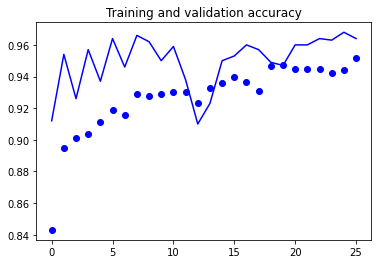

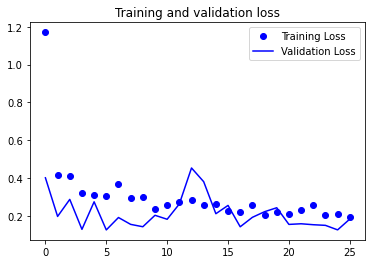

In [21]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Como podemos ver el entrenamiento partiendo del modelo de Inception V3 tiene resultados mucho mejores llegando a un accuracy de 95%, esto constanta nuestras sospechas de datos insuficientes después de aplicar sólo data augmentation y dropout.

Si comparamos resultados tenemos:

* CNN 1 --> Sin data augmentation ni dropout

    #EPOCH = 15

    TRAIN:        LOSS = 0.0598     ACCURACY = 0.9900
    VALIDATION    LOSS = 2.0866     ACCURACY = 0.6610

* CNN 2 --> Con data augmentation y dropout

    #EPOCH = 100

    TRAIN:        LOSS = 0.4641     ACCURACY = 0.7925
    VALIDATION    LOSS = 0.5528     ACCURACY = 0.7390

* CNN 3 --> Con Transfer learning (InceptionV3) + data augmentation y dropout

    #EPOCH = 26

    TRAIN:        LOSS = 0.1971     ACCURACY = 0.9520
    VALIDATION    LOSS = 0.1839     ACCURACY = 0.9640

Claramente la primera técnica (data augmentation + dropout) solucionó nuestros problemas de sobreajuste pero el entrenamiento era más lento y con accuracy mejorable. En cambio el transfer learning nos ha dado resultados muchísimo mejores y en tiempo de ejecución y accuracy.   
